In [5]:
import json
import pandas as pd
import re

In [6]:
# git 에서 파일을 다운받은 후 본인의 파일경로로 지정해주시면 됩니다.
with open('/content/drive/MyDrive/KDT 공부/9. 자연어 처리/data/용례_미디어.json', 'r', encoding='utf-8') as file:
  data = json.load(file)

print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
print(type(data))

In [8]:
data[0]

<class 'list'>


{'id': 2984691,
 'sentence': '일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯ㅋㅋㅋ',
 'tokens': [{'start': 31,
   'length': 3,
   'sub': '기대작',
   'facet': '연예/스포츠/언론/미디어적',
   'term_id': 131724,
   'sense_no': 1}],
 'sense_no': 1,
 'source': {'uri': 'https://bbs.ruliweb.com/community/board/300143/read/58831853',
  'text': '대충 메이드를 동경하는 주인공\r\n\r\n\r\n\r\n\r\n아키바에 도착해서 본 현직 메이드들!!\r\n\r\n\r\n\r\n\r\n주인공이 취업하게 된 메이드카페\r\n\r\n\r\n\r\n\r\n\r\n\r\n이런걸 배운다!!!\r\n\r\n\r\n\r\n\r\n\r\n\r\n뭐 이런저런 메이드들의 고난과 삶 애환 이런걸 담은 애니로군.\r\n\r\n\r\n했는데\r\n이게...\r\nㅋㅋㅋㅋㅋ\r\n\r\n\r\n진짜 매우 신밬했다.\r\n일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯ㅋㅋㅋ',
  'written_at': '2022-10-07T12:33:00'}}

In [9]:
len(data)

12935

In [10]:
texts = []

for i in data:
  text = i['source']['text']
  texts.append(text)

In [11]:
print(texts[:2])

['대충 메이드를 동경하는 주인공\r\n\r\n\r\n\r\n\r\n아키바에 도착해서 본 현직 메이드들!!\r\n\r\n\r\n\r\n\r\n주인공이 취업하게 된 메이드카페\r\n\r\n\r\n\r\n\r\n\r\n\r\n이런걸 배운다!!!\r\n\r\n\r\n\r\n\r\n\r\n\r\n뭐 이런저런 메이드들의 고난과 삶 애환 이런걸 담은 애니로군.\r\n\r\n\r\n했는데\r\n이게...\r\nㅋㅋㅋㅋㅋ\r\n\r\n\r\n진짜 매우 신밬했다.\r\n일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯ㅋㅋㅋ', '교통 문제가 너무 심각한데 이걸 해결할 생각이 없나.']


In [12]:
text_df = pd.DataFrame({'document': texts})
text_df

,document
0,대충 메이드를 동경하는 주인공\r\n\r\n\r\n\r\n\r\n아키바에 도착해서 ...
1,교통 문제가 너무 심각한데 이걸 해결할 생각이 없나.
2,이게 전부 새벽의 저주를 너무 잘찍어서 그럼 그 다음에 300으로 영상미 끝장내버리...
3,인터넷에는 잉여력 넘치는 사람들이 많아서 그냥 따라만 해도 할수있게 설명한게 많음
4,우리 아버지는 제철업계에서 유명한 거물이야.
...,...
12930,걔는 프랑스어를 직독 직해 할 수 있는 실력자야.
12931,그는 항상 수지 타산을 따져서 우리들 사이에서 장사꾼이라고 불려.
12932,대기업 고액 연봉자에 부러울거 없는 분 같은데..\r\n \r\n왜 저런 악귀한테 ...
12933,근처 초등학교에서 단체 관람단이 온 것 같아.


In [13]:
# 데이터셋의 결측값을 제거하고 총 데이터셋의 갯수를 출력
text_df = text_df.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(text_df)}')

필터링된 데이터셋 총 개수: 12935


In [14]:
# 열을 기준으로 중복된 데이터를 제거
processed_text_df = text_df.drop_duplicates(subset=['document']).reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(processed_text_df)}')

필터링된 데이터셋 총 개수: 12743


In [15]:
# 데이터셋의 데이터 중 특수 문자를 제거
processed_text_df['document'] = processed_text_df['document'].str.replace('[^가-힣0-9]', ' ')
processed_text_df

<ipython-input-15-185b36c98e88>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_text_df['document'] = processed_text_df['document'].str.replace('[^가-힣0-9]', ' ')


,document
0,대충 메이드를 동경하는 주인공 아키바에 도착해서 본 현직 메이드들 ...
1,교통 문제가 너무 심각한데 이걸 해결할 생각이 없나
2,이게 전부 새벽의 저주를 너무 잘찍어서 그럼 그 다음에 300으로 영상미 끝장내버리...
3,인터넷에는 잉여력 넘치는 사람들이 많아서 그냥 따라만 해도 할수있게 설명한게 많음
4,우리 아버지는 제철업계에서 유명한 거물이야
...,...
12738,걔는 프랑스어를 직독 직해 할 수 있는 실력자야
12739,그는 항상 수지 타산을 따져서 우리들 사이에서 장사꾼이라고 불려
12740,대기업 고액 연봉자에 부러울거 없는 분 같은데 왜 저런 악귀한테 목을 메...
12741,근처 초등학교에서 단체 관람단이 온 것 같아


In [16]:
processed_text_df['document'][0]

'대충 메이드를 동경하는 주인공          아키바에 도착해서 본 현직 메이드들            주인공이 취업하게 된 메이드카페              이런걸 배운다                 뭐 이런저런 메이드들의 고난과 삶 애환 이런걸 담은 애니로군       했는데  이게                진짜 매우 신밬했다   일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯   '

In [17]:
# 공백 여러 개를 하나로 줄이는 정규 표현식
processed_text_df['document'] = processed_text_df['document'].str.replace(r'\s+', ' ')
print(processed_text_df['document'][0])

<ipython-input-17-138ffbb32a81>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  processed_text_df['document'] = processed_text_df['document'].str.replace(r'\s+', ' ')


대충 메이드를 동경하는 주인공 아키바에 도착해서 본 현직 메이드들 주인공이 취업하게 된 메이드카페 이런걸 배운다 뭐 이런저런 메이드들의 고난과 삶 애환 이런걸 담은 애니로군 했는데 이게 진짜 매우 신밬했다 일단 1화 보니까 이번 가을 수성의 마녀와 함께 최고의 기대작인듯 


In [18]:
# 데이터셋의 길이가 너무 짧은 단어를 제거(단어의 길이가 2이하)
processed_text_df['document'] = processed_text_df['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))

print(processed_text_df['document'][0])

메이드를 동경하는 주인공 아키바에 도착해서 메이드들 주인공이 취업하게 메이드카페 이런걸 배운다 이런저런 메이드들의 고난과 이런걸 애니로군 했는데 신밬했다 보니까 수성의 마녀와 최고의 기대작인듯


In [19]:
# 전체 문장이 50자 이하거나 전체 단어의 갯수가 3개 이하인 데이터를 필터링
processed_text_df = processed_text_df[processed_text_df.document.apply(lambda x: len(str(x)) > 100 and len(str(x).split()) > 3)].reset_index(drop=True)
processed_text_df

,document
0,메이드를 동경하는 주인공 아키바에 도착해서 메이드들 주인공이 취업하게 메이드카페 이...
1,판타지를 충족해주는 창작물로 현실도피하는 처음부터 측면에 집중해 극단적으로 판타지를...
2,안녕하세요 입니다 저번주에 부분도색까지 두삭크 드디어 유광마감재 뿌리고 완성했습니다...
3,김일성의 아버지 김형직이 반공주의자였고 공산주의자에게 당하였다고 나무위키에 써져있는...
4,세워놓고 그림만 잡는다고 나오는게 그런건 잡으려고 급조한 찍은거에 불과함 얘기를 싶...
...,...
5269,본격적으로 핫휠을 모으게 계기가 포르자 시리즈 입니다 저처럼 포르자 좋아하시는 지나...
5270,괜찮으시거나 흥미가 가볍게 접하보고 싶으시다면 팟캐스트도 괜찮습니다 팟캐스트의 내용...
5271,우리나라 지금까지 실업률을 2012년 2013년 2014년 2015년 2016년 2...
5272,업체는 알고있을거니까 소개팅 어플은 매칭할때 남자에게 포인트 지르라고 권유하거든 여...


In [20]:
# 한국어 불용어 받아오기
import requests

gist_url = 'https://gist.githubusercontent.com/chulgil/d10b18575a73778da4bc83853385465c/raw'
response = requests.get(gist_url)

if response.status_code == 200:
    with open('stopwords_kr.txt', 'w', encoding='utf-8') as file:
        file.write(response.text)
    print('파일이 다운로드되었습니다.')
else:
    print('파일을 다운로드하는 중에 문제가 발생했습니다. 상태 코드:', response.status_code)

파일이 다운로드되었습니다.


In [21]:
# 파일 경로 설정
file_path = '/content/stopwords_kr.txt'

# 파일 읽기
with open(file_path, 'r', encoding='utf-8') as file:
    stopwords = file.read().splitlines()

In [22]:
tokenized_doc = processed_text_df['document'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in stopwords])
print(tokenized_doc)

0       [메이드를, 동경하는, 주인공, 아키바에, 도착해서, 메이드들, 주인공이, 취업하게...
1       [판타지를, 충족해주는, 창작물로, 현실도피하는, 처음부터, 측면에, 집중해, 극단...
2       [안녕하세요, 입니다, 저번주에, 부분도색까지, 두삭크, 드디어, 유광마감재, 뿌리...
3       [김일성의, 아버지, 김형직이, 반공주의자였고, 공산주의자에게, 당하였다고, 나무위...
4       [세워놓고, 그림만, 잡는다고, 나오는게, 그런건, 잡으려고, 급조한, 찍은거에, ...
                              ...                        
5269    [본격적으로, 핫휠을, 모으게, 계기가, 포르자, 시리즈, 입니다, 저처럼, 포르자...
5270    [괜찮으시거나, 흥미가, 가볍게, 접하보고, 싶으시다면, 팟캐스트도, 괜찮습니다, ...
5271    [우리나라, 지금까지, 실업률을, 2012년, 2013년, 2014년, 2015년,...
5272    [업체는, 알고있을거니까, 소개팅, 어플은, 매칭할때, 남자에게, 포인트, 지르라고...
5273    [대기업, 연봉자에, 부러울거, 같은데, 악귀한테, 뜯어내는거로도, 모자라, 자신을...
Name: document, Length: 5274, dtype: object


In [23]:
tokenized_doc = tokenized_doc.to_list()
len(tokenized_doc)

5274

In [24]:
print(tokenized_doc[:10])

[['메이드를', '동경하는', '주인공', '아키바에', '도착해서', '메이드들', '주인공이', '취업하게', '메이드카페', '이런걸', '배운다', '이런저런', '메이드들의', '고난과', '이런걸', '애니로군', '했는데', '신밬했다', '보니까', '수성의', '마녀와', '최고의', '기대작인듯'], ['판타지를', '충족해주는', '창작물로', '현실도피하는', '처음부터', '측면에', '집중해', '극단적으로', '판타지를', '충족할', '있도록', '만들어진', '창작물', '마찬가지로', '장르의', '현실도피라고', '경우는', '한숨밖에', '사람들', '들어보면', '단순히', '창작물에서', '대리만족', '현실도피', '사람도', '커뮤니티에선', '보지도', '않으면서', '스낵컬쳐에', '이미지만을', '작품의', '주인공은', '어떻고', '독자들은', '주인공을', '선망하고', '떠들어대는', '사람까지', '전문가가', '논문까지', '써가며', '연관성을', '증명했다면', '비전문가따리인', '커뮤쟁이가', '반박은', '못하겠는데', '솔직히', '커뮤니티에서', '창작물의', '현실도피', '논하면', '억까겠거니'], ['안녕하세요', '입니다', '저번주에', '부분도색까지', '두삭크', '드디어', '유광마감재', '뿌리고', '완성했습니다', '일주일', '마감재', '뿌리는', '생각하며', '일주일', '버텼습니다', '마감재', '뿌려주고', '햇빛에', '반나절정도', '말려주었습니다', '조립하는', '순간을', '어마나', '기다렸던가', '배색으로', '도색을', '했는데도', '밑색이', '달라서', '마스크', '부분과', '부분이', '차이가', '있네요', '서페이서를', '건너뛰고', '은색을', '뿌려서', '그런가', '봅니다', '부분이', '버젼이었다면', '좋았을텐데', '아쉽긴', '디테일을', '재현해준게', '고맙기만', '합니다', '알았습니다', '이번도색

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [27]:
word2idx = tokenizer.word_index

idx2word = {value: key for key, value in word2idx.items()}

encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [28]:
vocab_size = len(word2idx)
print(f'단어사전의 크기: {vocab_size}')

단어사전의 크기: 373643


In [29]:
print(len(encoded))

5274


In [30]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [39]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:100]]

In [40]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [41]:
# 중심 단어를 위한 임베딩 테이블
embedding_dim = 100

w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [42]:
import tensorflow as tf

In [43]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1,1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)

with tf.device('/GPU:0'):
    model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 1, 100)               3736430   ['input_3[0][0]']             
                                                          0                                       
                                                                                                  
 embedding_3 (Embedding)     (None, 1, 100)               3736430   ['input_4[0][0]']       

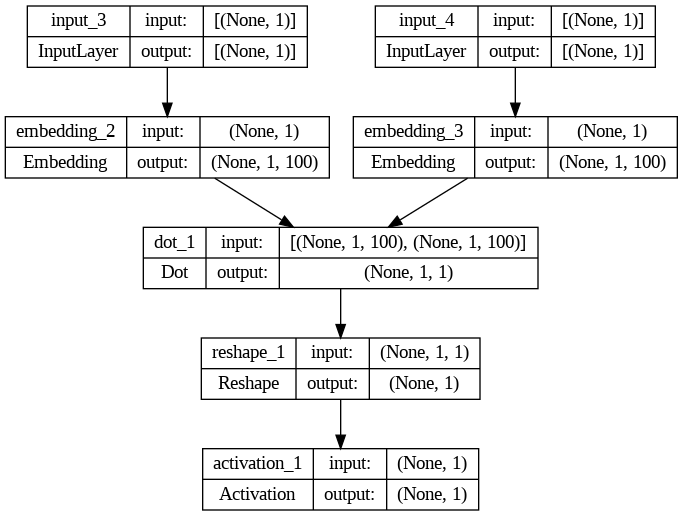

In [44]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [45]:
import numpy as np

In [46]:
for epoch in range(100):
    loss = 0
    for _, elem in enumerate(training_dataset):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [tf.convert_to_tensor(first_elem), tf.convert_to_tensor(second_elem)]
        Y = tf.convert_to_tensor(labels)
        loss += model.train_on_batch(X, Y)
    print('Epoch:', epoch+1, 'Loss:', loss)

Epoch: 1 Loss: 69.31456762552261
Epoch: 2 Loss: 68.85753506422043
Epoch: 3 Loss: 68.04819142818451
Epoch: 4 Loss: 66.54183608293533
Epoch: 5 Loss: 64.05196660757065
Epoch: 6 Loss: 60.460114538669586
Epoch: 7 Loss: 55.85517796874046
Epoch: 8 Loss: 50.502487540245056
Epoch: 9 Loss: 44.76841986179352
Epoch: 10 Loss: 39.031759947538376
Epoch: 11 Loss: 33.60822428762913
Epoch: 12 Loss: 28.707338213920593
Epoch: 13 Loss: 24.427187144756317
Epoch: 14 Loss: 20.776975587010384
Epoch: 15 Loss: 17.710009410977364
Epoch: 16 Loss: 15.153225697577
Epoch: 17 Loss: 13.027391612529755
Epoch: 18 Loss: 11.258223440498114
Epoch: 19 Loss: 9.781104039400816
Epoch: 20 Loss: 8.542113717645407
Epoch: 21 Loss: 7.497282635420561
Epoch: 22 Loss: 6.611176922917366
Epoch: 23 Loss: 5.855382688343525
Epoch: 24 Loss: 5.207128098234534
Epoch: 25 Loss: 4.648123966529965
Epoch: 26 Loss: 4.163624810054898
Epoch: 27 Loss: 3.741684939712286
Epoch: 28 Loss: 3.37257394567132
Epoch: 29 Loss: 3.048321063630283
Epoch: 30 Loss: 2

In [47]:
# Word2Vec 모델을 학습시키고 학습된 모델을 활용하여 단어간 유사도 측정
import gensim

In [48]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size, embedding_dim))
vectors = model.get_weights()[0]
print(vectors)
print(len(vectors))

[[-3.5130311e-02 -9.6395239e-03  2.5770012e-02 ... -1.2272466e-02
   3.4955394e-02  6.4775348e-03]
 [ 9.8413563e-01 -1.0593977e+00  8.1543863e-01 ...  2.9430747e-01
   1.2436588e+00 -7.4547029e-01]
 [ 1.1467539e+00 -1.1541035e+00 -7.4691164e-01 ... -5.3777206e-01
   1.6341560e-01  9.2635179e-01]
 ...
 [ 3.8161252e-02  3.2876696e-02 -3.9090157e-02 ... -6.7107081e-03
  -2.6388193e-02  3.6913250e-02]
 [-4.1060470e-02  6.0915239e-03  2.0047817e-02 ...  9.7616315e-03
  -2.7097596e-02  8.3762407e-04]
 [-4.3907072e-02  1.9630801e-02  4.7445048e-02 ...  2.1832351e-02
   1.3778795e-02 -4.8983898e-02]]
373643


In [49]:
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i-1, :])))))
f.close()

In [50]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt',binary=False)

In [52]:
w2v.most_similar(positive= ['주인공'])

[('배트맨', 0.5939726233482361),
 ('심정은', 0.5916719436645508),
 ('상황에서도', 0.5912014245986938),
 ('동질감을', 0.5760014653205872),
 ('사용해야만', 0.5669114589691162),
 ('출동하는', 0.5633172988891602),
 ('육군과', 0.5620700120925903),
 ('여기여', 0.5605008006095886),
 ('심리는', 0.5581042766571045),
 ('그만두라고', 0.5579624176025391)]

In [53]:
w2v.most_similar(positive= ['아버지'])

[('퍼티를', 0.4368930160999298),
 ('화포의', 0.43283772468566895),
 ('쫄리냐', 0.42762213945388794),
 ('출력됨', 0.42305535078048706),
 ('닭손질도', 0.41191479563713074),
 ('자기소개서', 0.4067990183830261),
 ('절반가량을', 0.401900053024292),
 ('8중대에서', 0.40167781710624695),
 ('사회복지를', 0.3980896770954132),
 ('장계를', 0.39790579676628113)]